In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TOPIC AND SENTIMENT INTENSITY + VISITOR ATTENTION INDEX + ECONOMIC INDEX - DATA COMPOSITION 2 (80-10-10).csv', index_col="Month", parse_dates=True)
df.head()

,Tourist Arrival,NegativityQDAP,PositivityQDAP,TOPIC 1,TOPIC 2,TOPIC 3,TOPIC 4,TOPIC 5,TOPIC 6,TOPIC 7,...,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,CCI,PMI,REERI,Class
Month,,,,,,,,,,,,,,,,,,,,,
2008-01-01,399556,0.181818,0.090909,0.008715,0.010894,0.889993,0.011228,0.010641,0.001710,0.014932,...,18,20,0,32,0,8,98.4,53.3,109,Train
2008-01-02,411032,0.000000,0.090909,0.009085,0.010974,0.007221,0.006829,0.006410,0.005451,0.011673,...,10,19,5,39,7,5,90.8,53.0,108,Train
2008-01-03,414332,0.142857,0.000000,0.008164,0.005849,0.006917,0.009097,0.007196,0.001611,0.007281,...,38,28,6,30,0,0,89.5,53.4,106,Train
2008-01-04,395900,0.214286,0.071429,0.007528,0.013789,0.005867,0.911020,0.012191,0.001259,0.014063,...,25,22,8,45,0,8,82.6,56.4,106,Train
2008-01-05,366387,0.000000,0.100000,0.008862,0.007257,0.010529,0.011619,0.014288,0.001458,0.015968,...,16,22,5,47,0,9,79.8,57.2,106,Train


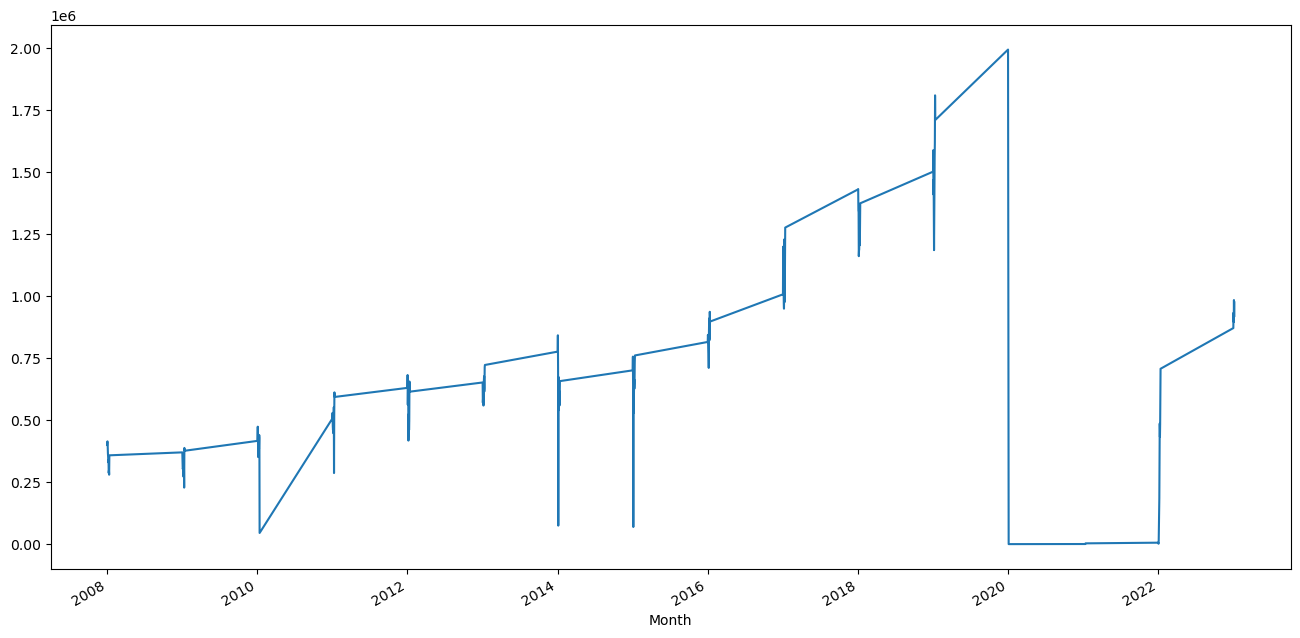

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [4]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  NegativityQDAP  PositivityQDAP   TOPIC 1  \
Month                                                                   
2008-01-01           399556        0.181818        0.090909  0.008715   
2008-01-02           411032        0.000000        0.090909  0.009085   
2008-01-03           414332        0.142857        0.000000  0.008164   
2008-01-04           395900        0.214286        0.071429  0.007528   
2008-01-05           366387        0.000000        0.100000  0.008862   
...                     ...             ...             ...       ...   
2023-01-02           932969        0.000000        0.181818  0.014135   
2023-01-03           895425        0.000000        0.142857  0.007677   
2023-01-04           984146        0.000000        0.222222  0.014135   
2023-01-05           916257        0.000000        0.125000  0.014135   
2023-01-06           975010        0.000000        0.111111  0.012180   

             TOPIC 2   TOPIC 3   TOPIC 4   TOPIC 5

In [5]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4947.042, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4937.754, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4938.437, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4945.121, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4948.808, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4939.754, Time=0.15 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4939.754, Time=0.12 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4938.184, Time=0.05 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4940.975, Time=0.28 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4935.707, Time=0.04 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=4937.707, Time=0.12 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4937.707, Time=0.11 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4936.131, Time=0.04 sec
 ARIMA(0,1,0)(2,0,1)[12]

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [6]:
train = df1['Tourist Arrival'][:'01/04/2020'].dropna()
test = df1['Tourist Arrival']['01/05/2020':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/04/2020'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/05/2020':].dropna()

In [7]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           36     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19387D+01    |proj g|=  6.01599D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   36      0      1      0     0     0   6.016D-06   1.194D+01
  F =   11.938728383966863     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Tourist Arrival   No. Observations:                  148
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -1766.932
Date:                            Wed, 23 Aug 2023   AIC                           3605.864
Time:                                    22:25:41   BIC                           3710.453
Sample:                                         0   HQIC                          3648.366
                                            - 148                                         
Covariance Type:                              opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
NegativityQDAP           2.458e+05   1.44e+05      1.706      0.088   -3.66e+04    5.28e+05
PositivityQDAP           2.603e+05   1.54e+05      1.695      0.090   -4.07e+04    5.61e+05
TOPIC 1                 -1.708e+05   1.04e+05     -1.644      0.100   -3.74e+05    3.29e+04
TOPIC 2                 -1.778e+05   7.64e+04     -2.327      0.020   -3.28e+05    -2.8e+04
TOPIC 3                 -7.134e+04   7.04e+04     -1.014      0.311   -2.09e+05    6.66e+04
TOPIC 4                 -8.783e+04      5e+04     -1.757      0.079   -1.86e+05    1.01e+04
TOPIC 5                 -2.943e+04   6.33e+04     -0.465      0.642   -1.54e+05    9.47e+04
TOPIC 6                 -5.722e+04   1.44e+05     -0.399      0.690   -3.38e+05    2.24e+05
TOPIC 7                 -9.653e+04   5.61e+04     -1.720      0.085   -2.07e+05    1.35e+04
TOPIC 8                 -8.234e+04   5.61e+04     -1.469      0.142   -1.92e+05    2.75e+04
TOPIC 9                 -1.071e+05   5.13e+04     -2.089      0.037   -2.08e+05   -6614.085
TOPIC 10                -8.527e+04   6.27e+04     -1.361      0.174   -2.08e+05    3.76e+04
Airbnb Vietnam          -1490.9928   2681.035     -0.556      0.578   -6745.725    3763.739
Vietnam restaurant       3338.0404   3116.152      1.071      0.284   -2769.505    9445.586
Shopping in Hanoi        1118.9116   3303.986      0.339      0.735   -5356.782    7594.605
Shopping in Ho Chi Minh  1229.8517   3782.273      0.325      0.745   -6183.268    8642.972
 Vietnam tour           -1138.0502   4173.601     -0.273      0.785   -9318.157    7042.057
 Skyscanner              4106.8507   4847.619      0.847      0.397   -5394.309    1.36e+04
 Vietnam visa            3094.4853   5164.848      0.599      0.549   -7028.430    1.32e+04
 Vietnam airport         1593.4651   4035.993      0.395      0.693   -6316.935    9503.865
 Vietnam flights        -2520.8457   4246.595     -0.594      0.553   -1.08e+04    5802.328
 Danang airport          -805.5997   1740.186     -0.463      0.643   -4216.302    2605.102
 Hoi An                 -3056.5286   2619.799     -1.167      0.243   -8191.240    2078.183
 Vietnam weather          833.8978   2260.087      0.369      0.712   -3595.791    5263.586
 Visa for Vietnam        4440.3682   4992.059      0.889      0.374   -5343.888    1.42e+04
 Sgn airport              962.9537   2488.930      0.387      0.699   -3915.260    5841.168
 Phu Quoc                4642.3619   2636.388      1.761      0.078    -524.864    9809.588
 Vietnam itinerary       -616.9635   3015.637     -0.205      0.838   -6527.503    5293.576
 Vietnam trip            4953.2981   2680.289      1.848      0.065    -299.971    1.02e+04
 Things to do in Hue     2616.2146   3651.051      0.717      0.474   -4539.714    9772.143
 Vietnam backpackers    -5797.3397   3895.959     -1.488      0.137   -1.34e+04    1838.600
CCI  

In [8]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 347702.2577055999


In [11]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 312941.4163683487


In [12]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 4.515801373674951e+20


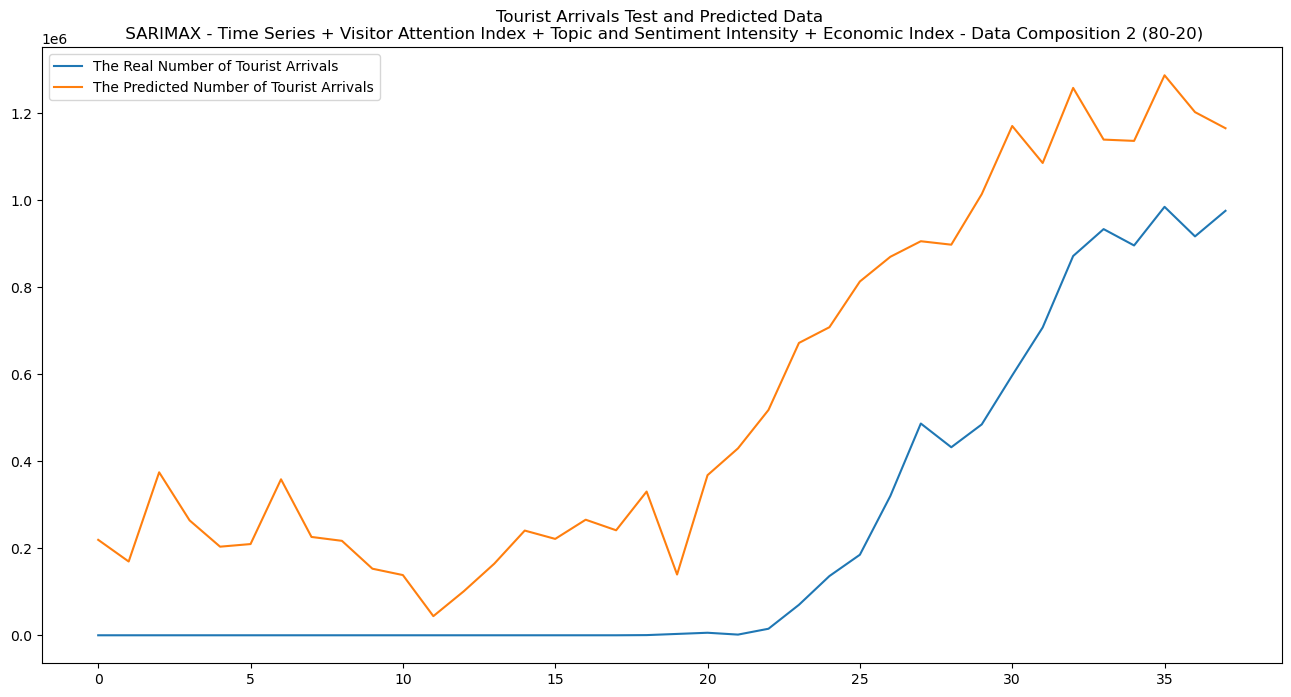

In [13]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Visitor Attention Index + Topic and Sentiment Intensity + Economic Index - Data Composition 2 (80-20)")
plt.legend()
plt.show()